# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps. By exploring and analysing the data to discover key factors responsible for app engagement and success we can gain insights for the apps and their genre to invest or work on for higher success probability.

The Play Store data, split into '**_App Data_**' and '**_User Review data_**', is loaded with info about app categories, ratings, sizes, and more. We're diving in to figure out what makes Android apps a hit. We're looking at how things like app size affect how many people download them, finding out which app types people like most based on ratings and downloads, and seeing how user reviews affect an app's success.

# **GitHub Link -**

https://github.com/ahmeddhankwala/EDA-PlayStore

# **Problem Statement**


**Our mission is to understand how different things about an app, like its size, impact how many times it gets installed. We also want to figure out which types of apps, based on user ratings and downloads, are the most popular. And we're exploring how user reviews play into an app's success. This analysis is all about giving app makers the inside scoop so they can focus on the right stuff and make apps that people love.**

#### **Define Your Business Objective?**

Utilize Play Store data insights to boost app performance and market presence. Our goal is to uncover what makes apps successful, enhance user satisfaction, and drive revenue. By analyzing this data, we aim to give app developers actionable tips to improve their apps, make users happier, and position their creations for long-term success in the Play Store.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
ad_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv')
ur_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User Reviews.csv')

Mounted at /content/drive


In [4]:
ad_df_bkp = ad_df.copy()
ur_Df_bkp = ur_df.copy()

### Dataset First View

In [5]:
# Dataset First Look
ad_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
ad_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
ad_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4944,AppBrain Ad Detector,TOOLS,3.7,9221,1.7M,"1,000,000+",Free,0,Everyone,Tools,"April 12, 2018",2.2.1,4.1 and up
3976,Diary with lock,LIFESTYLE,4.6,815280,4.4M,"10,000,000+",Free,0,Everyone,Lifestyle,"June 30, 2018",4.90,4.1 and up
2376,HESI A2 Pocket Prep,MEDICAL,4.3,2108,28M,"50,000+",Free,0,Everyone,Medical,"May 2, 2018",4.5.1,4.4 and up
3543,Notepad & To do list,PRODUCTIVITY,4.3,226295,4.2M,"10,000,000+",Free,0,Everyone,Productivity,"June 6, 2018",4.3.19,2.3.3 and up
94,"Used car is the first car - used car purchase,...",AUTO_AND_VEHICLES,4.6,5097,19M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 23, 2018",1.5.18,4.0.3 and up
9205,Skin Disease,BEAUTY,4.0,1,2.2M,100+,Free,0,Everyone,Beauty,"August 30, 2017",1.0,2.2 and up
2935,"Cymera Camera- Photo Editor, Filter,Collage,La...",PHOTOGRAPHY,4.4,2418158,Varies with device,"100,000,000+",Free,0,Everyone,Photography,"July 12, 2018",Varies with device,Varies with device
2917,No Crop & Square for Instagram,PHOTOGRAPHY,4.6,819774,25M,"10,000,000+",Free,0,Everyone,Photography,"June 26, 2018",4.2.3,4.0 and up
9671,Masha and the Bear Child Games,FAMILY,4.1,288606,92M,"10,000,000+",Free,0,Everyone,Adventure;Education,"May 8, 2018",2.7.4,4.0 and up
3670,Motorola FM Radio,VIDEO_PLAYERS,3.9,54807,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device


In [8]:
ur_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [9]:
ur_df.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
ad_df.shape
#app data has 10841 rows and 13 columns

(10841, 13)

In [11]:
ur_df.shape
#user review data has 64295 rows and 5 columns

(64295, 5)

### Dataset Information

In [12]:
# Dataset Info
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
ad_df.duplicated().sum()

483

In [15]:
ur_df.duplicated().sum()

33616

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
ad_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [18]:
# Visualizing the missing values
ad_df[ad_df["Rating"].isnull()].sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8968,DV - Digito Verificador,TOOLS,NaN,2,4.2M,500+,Free,0,Everyone,Tools,"March 2, 2017",1.0,4.0 and up
6172,Bg Radios - Bulgarian radio stations online,FAMILY,NaN,8,13M,"1,000+",Free,0,Everyone,Entertainment,"July 13, 2018",1.3.2,4.1 and up
2439,Weill Cornell Medicine,MEDICAL,NaN,0,19M,50+,Free,0,Everyone,Medical,"July 16, 2018",1.0.10,5.0 and up
6544,BN DB1 App,PRODUCTIVITY,NaN,2,34M,50+,Free,0,Everyone,Productivity,"December 4, 2017",1.2,4.0.3 and up
5119,AG test,TOOLS,NaN,3,18M,100+,Free,0,Everyone,Tools,"October 18, 2017",1.0.2,4.1 and up
6916,Analog BW - Camera filter effect foto film ret...,PHOTOGRAPHY,NaN,2,17M,100+,Free,0,Everyone,Photography,"May 23, 2018",1.1,4.4 and up
8339,DF Wall Plus – Droid Firewall,TOOLS,NaN,9,6.3M,500+,Free,0,Everyone,Tools,"August 20, 2017",1.0,4.0.3 and up
8009,CW Mobile,FAMILY,NaN,3,22M,50+,Free,0,Everyone,Education,"June 25, 2018",3.3.99,4.2 and up
10807,My FR App,TOOLS,NaN,2,4.2M,100+,Free,0,Everyone,Tools,"April 9, 2018",1.283.0037,2.3.3 and up
10705,RRIMS FO,BUSINESS,NaN,2,5.2M,100+,Free,0,Everyone,Business,"July 27, 2018",4.2,5.0 and up


In [19]:
ad_df[ad_df["Rating"] < 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
ur_df[ur_df["Sentiment"].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### What did you know about your dataset?

- `Dirty Data (Data with Quality issues)`: Dirty data, also known as low quality data. Low quality data has content issues.
  - Duplicated data
  - Missing Data
  - Corrupt Data
  - Inaccurate Data
- `Messy Data (Data with tidiness issues)`: Messy data, also known as untidy data. Untidy data has structural issues.Tidy data has the following properties:

  - Each variable forms a column
  - Each observation forms a row
  - Each observational unit forms a table

  Reference  



### Issues with the dataset

1. Dirty Data

  Table - `App data`
  - Ratings has 1474 null values but there is also an observation that the there are no reviews less than 1 also the review is independent of installs as there are app with high installs but low rating and vice versa.
  -There are 483 duplicated rows.
  -The reviews column is of type object instead of int.
  -The size is in mb and kb and not in a single unit, therefore its also of data type object instead of int. Also there are 1695 apps whose size varies on the basis of device.
  -The installs is an incremental range and in object type. we can either convert into a ranked category or an int value on the basis of the value and use it as a category as well.
  -Type is of object type.
  -There is probably one row where category is 1.9 where all the data is shifted to left by 1 column.

  Table - `User Review`
  - There are 26863 null values in all columns except the app column.
  - There are 33616 duplicated rows.

1. Messy Data

  Table - `App data`
  
  -last Updated column has date in month_name,day,year format.


### Other details
- There are reviews on only the 1020 app in user review from the app data

## ***2. Understanding Your Variables***

In [21]:
# Dataset Columns
ad_df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [22]:
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [23]:
# Dataset Describe
ad_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [24]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [25]:
len(pd.merge(ur_df,ad_df, how = "inner", on = "App" )["App"].unique())

1020

### Variables Description

#### **Table** -> `App Data`:

####- `App`: Name of the App.
####- `Category`: The category the app belongs to.
####- `Rating` : The average rating given to the app from users from 0 to 5.
####- `Reviews` : The no of users who gave a review for the app.
####- `Size` : The size of the app in K as kb, M as Mb and for some it varies depending on the device.
####- `Installs` : The round-off number of downloads for each app in an incremental format of 1-5,5-10,10-50,50-100,100-500,....,1000000000 - 5000000000.
####- `Type`: This a categorical column which shows whether an app is paid or free.
####- `Price` : price for the paid apps in dollars.
####- `Content Rating`: The age groups the app can be used by.
####- `Genres`: The genre or the sub the genre the app belongs to.
####- `last updated`: This column contains the date when the app was last updated in month_name-Date, Year format.
####- `Current Version`: This column contains the data for the latest updated or the current version for the app.
####- `Android version`: The minimum Android Version for the app to work on the Device is Recorded  in this column.  

#### **Table** -> `User Review`:

####- `App`: The name of the app.
####- `Sentiment`: The categorical response of the app on the basis of user review that whether it is positive ,negative,neutral.
####- `Sentiment_polarity`: Sentiment polarity for an app defines the orientation of the expressed sentiment. In this column the sentiment is recorded Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment.
####- `Sentiment_subjectivity`: In this column Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

In [26]:
ur_df.sample(6).T

,42167,14863,60599,44625,33759,33424
App,FINAL FANTASY BRAVE EXVIUS,Bike Computer - GPS Cycling Tracker,Health and Nutrition Guide,Farming Simulator 14,Diabetes & Diet Tracker,Davis's Drug Guide
Translated_Review,The game fun mechanics good. But walking aroun...,SHERIDAN ALLEN PHILLIPS,Helpful healthy lifestyle,NaN,This excellent keeping track I eating. Perhaps...,NaN
Sentiment,Positive,Neutral,Positive,NaN,Positive,NaN
Sentiment_Polarity,0.011111,0.0,0.5,NaN,0.232,NaN
Sentiment_Subjectivity,0.444444,0.0,0.5,NaN,0.448,NaN


In [27]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Check Unique Values for each variable.

In [28]:
# Check Unique Values for each variable.
pd.Series({col:ad_df[col].unique() for col in ad_df})           # creating a series consisting every column name of the dataset and it's value.
                                                                # used for loop to iterate over every column in the dataset.


App               [Photo Editor & Candy Camera & Grid & ScrapBoo...
Category          [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...
Rating            [4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ...
Reviews           [159, 967, 87510, 215644, 167, 178, 36815, 137...
Size              [19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3....
Installs          [10,000+, 500,000+, 5,000,000+, 50,000,000+, 1...
Type                                           [Free, Paid, nan, 0]
Price             [0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ...
Content Rating    [Everyone, Teen, Everyone 10+, Mature 17+, Adu...
Genres            [Art & Design, Art & Design;Pretend Play, Art ...
Last Updated      [January 7, 2018, January 15, 2018, August 1, ...
Current Ver       [1.0.0, 2.0.0, 1.2.4, Varies with device, 1.1,...
Android Ver       [4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and...
dtype: object

In [29]:
#using this code for an expanded view of the unique values in columns
for col in ad_df:
  print(ad_df[col].unique())



['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
['159' '967' '87510' ... '603' '1195' '398307']
['19M' '14M' '8.7M' '25M' '2.8M' '

In [30]:
ad_df.groupby('Category')['Genres'].unique()

Category
1.9                                                  [February 11, 2018]
ART_AND_DESIGN         [Art & Design, Art & Design;Pretend Play, Art ...
AUTO_AND_VEHICLES                                      [Auto & Vehicles]
BEAUTY                                                          [Beauty]
BOOKS_AND_REFERENCE                                  [Books & Reference]
BUSINESS                                                      [Business]
COMICS                                       [Comics, Comics;Creativity]
COMMUNICATION                                            [Communication]
DATING                                                          [Dating]
EDUCATION              [Education;Education, Education, Education;Cre...
ENTERTAINMENT          [Entertainment, Entertainment;Music & Video, E...
EVENTS                                                          [Events]
FAMILY                 [Entertainment;Music & Video, Casual;Brain Gam...
FINANCE                                   

## 3. ***Data Wrangling***

### Data Wrangling Code

In [31]:
# Write your code to make your dataset analysis ready.

#drop duplicates
ad_df.drop_duplicates(inplace = True)
ur_df.drop_duplicates(inplace = True)

In [32]:
#checking info again after droping
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [33]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [34]:
#removing null values from user review dataframe
ur_df= ur_df[~ur_df["Translated_Review"].isnull()]

In [35]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [36]:
#filling and dropping the null data from app data datframe
# since the ratings are only above one the assumption is that below one the ratings are written as Nan so replacing them with 0.5 for the mean between 0 and 1
#ad_df['Rating'].fillna(0.5,inplace = True)

In [37]:
#removing the cascading column
ad_df = ad_df[ad_df['Category'] != '1.9']

In [38]:
# changing the reviews type to int
ad_df['Reviews'] = ad_df['Reviews'].astype(int)

<ipython-input-38-40710309273e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_df['Reviews'] = ad_df['Reviews'].astype(int)


In [39]:
#drop some null values
ad_df= ad_df[~ad_df['Type'].isnull()]
ad_df= ad_df[~ad_df['Current Ver'].isnull()]
ad_df= ad_df[~ad_df['Android Ver'].isnull()]

In [40]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          8886 non-null   float64
 3   Reviews         10346 non-null  int64  
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [41]:
#modifying the data in the installs to convert into int type
ad_df['Installs'] = ad_df['Installs'].str.replace('+','').str.replace("'",'').str.replace(",","")

<ipython-input-41-450b4d0e7f36>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ad_df['Installs'] = ad_df['Installs'].str.replace('+','').str.replace("'",'').str.replace(",","")


In [42]:
#checking if modification is correct
ad_df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [43]:
#converting to int type
ad_df['Installs'] = ad_df['Installs'].astype(int)

In [44]:
#now converting the size in a single unit.
ad_df[ad_df['Size'] == '1,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [45]:
ad_df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10346, dtype: object

In [46]:
#Creating a function to convert the size from mb to kb and keep the kb in kb
def size(x):
  if 'k' in x:
    x = x.replace('k',"")
  elif 'M' in x:
    x = x.replace('M',"")
    x = float(x) * 1000
  elif x == 'Varies with device':
    x = np.nan
  return x



In [47]:
#using apply converting the size from mb to kb using the above function
ad_df['Size'] = ad_df['Size'].apply(size)

In [48]:
ad_df['Size'].unique()

array([19000.0, 14000.0, 8700.0, 25000.0, 2800.0, 5600.0, 29000.0,
       33000.0, 3100.0, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0,
       5500.0, 17000.0, 39000.0, 31000.0, 4200.0, 7000.0, 23000.0, 6000.0,
       6100.0, 4600.0, 9200.0, 5200.0, 11000.0, 24000.0, nan, 9400.0,
       15000.0, 10000.0, 1200.0, 26000.0, 8000.0, 7900.0, 56000.0,
       57000.0, 35000.0, 54000.0, '201', 3600.0, 5700.0, 8600.0, 2400.0,
       27000.0, 2700.0, 2500.0, 16000.0, 3400.0, 8900.0, 3900.0, 2900.0,
       38000.0, 32000.0, 5400.0, 18000.0, 1100.0, 2200.0, 4500.0, 9800.0,
       52000.0, 9000.0, 6700.0, 30000.0, 2600.0, 7100.0, 3700.0, 22000.0,
       7400.0, 6400.0, 3200.0, 8200.0, 9900.0, 4900.0, 9500.0, 5000.0,
       5900.0, 13000.0, 73000.0, 6800.0, 3500.0, 4000.0, 2300.0, 7200.0,
       2100.0, 42000.0, 7300.0, 9100.0, 55000.0, '23', 6500.0, 1500.0,
       7500.0, 51000.0, 41000.0, 48000.0, 8500.0, 46000.0, 8300.0, 4300.0,
       4700.0, 3300.0, 40000.0, 7800.0, 8800.0, 6600.0, 5100.0, 6100

In [49]:
#replacing varies with device to null for proper details
#ad_df['Size'].apply(lambda x: np.nan if x == "Varies with device" else x)

In [50]:
#change the type of size
ad_df['Size'] = ad_df['Size'].astype(float)

In [51]:
#Replace the $ in price and change the type to float
ad_df['Price'] = ad_df['Price'].str.replace('$','').astype(float)

<ipython-input-51-bf822f4cc891>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ad_df['Price'] = ad_df['Price'].str.replace('$','').astype(float)


In [52]:
ad_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [53]:
#change  the last updated to data type datetime
ad_df['Last Updated'] = pd.to_datetime(ad_df['Last Updated'])

In [54]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          8886 non-null   float64       
 3   Reviews         10346 non-null  int64         
 4   Size            8821 non-null   float64       
 5   Installs        10346 non-null  int64         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [55]:
ad_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Rating,Reviews,Size,Installs,Price
count,8886.00000,10346.00000,8821.00000,10346.00000,10346.00000
mean,4.18796,406333.77064,21306.61269,14172659.71554,1.03156
std,0.52243,2698179.07428,22545.48506,80280899.85661,16.28725
min,1.00000,0.00000,8.50000,0.00000,0.00000
25%,4.00000,32.00000,4700.00000,1000.00000,0.00000
50%,4.30000,1688.50000,13000.00000,100000.00000,0.00000
75%,4.50000,46598.25000,29000.00000,1000000.00000,0.00000
max,5.00000,78158306.00000,100000.00000,1000000000.00000,400.00000


In [56]:
ad_df[ad_df['Type'] == 'Free']['Type'].count()

9584

In [57]:
ad_df[ad_df['Price'] == 0]['Price'].count()

9584

In [58]:
ad_df[ad_df['Type'] == 'Paid']['Type'].count()

762

In [59]:
ad_df[ad_df['Price'] != 0]['Price'].count()/len(ad_df['Price']) * 100

7.365165281268123

### What all manipulations have you done and insights you found?

The first thing i did after loading the dataset was to create a copy of the data.First i have assesed the dataframe and found the issues i could have in the data during the analysis and noted them down.Then in the data wrangling dropped the duplicated columns,left the null values in the reviews as it is on the assumption that those app werent rated so to understand why they werent.removed the null values from the other columns and changed the following columns datatype by replacing their string parts like $,+ with nothing and also converted the size columns mb and kb data to single unit of kb and the Varies with device to null.
  - Installs and Reviews to int
  - Size and Price to float
  - Last Updated to datetime

#**Insights after Manipulation**
1. The installs column is in a incremental range so it can be used as a
numerical but also a categorical column.

2. Genres columns is the sub branch of the category column.

3. Only 25% apps have Rating below 4 but also almost only 25% have a rating between 4.5 - 5.

4. There are only 7.3% Paid Apps.

###**Column Types**

  - **Table** - App Data

      - `Numerical` - Rating,	Reviews,	Size,	Installs,	Price.

      - `Categorical` - Category,  Type,  Content Rating, Genres,  Installs.

      - `Mixed` - App,  Last Updated, Current ver, Android Ver


  - **Table** - User Review

    - `Numerical` - Sentiment Polarity, Sentiment Subjectivity.

    - `Categorical` - Sentiment.

    - `Mixed` - App, Translated Review.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**Univariate Analysis.**

#### Chart - 1

In [60]:
# Chart - 1 visualization code


Text(0.5, 0, 'Rating')

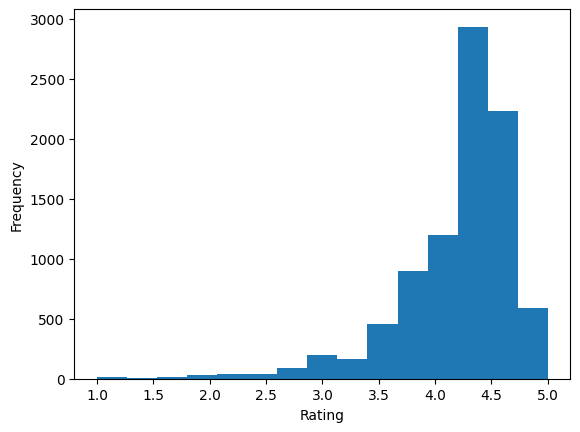

In [61]:
ax =ad_df['Rating'].plot(kind = 'hist', bins = 15, xlabel = 'Rating',)
ax.set_xlabel("Rating")


##### 1. Why did you pick the specific chart?

I picked the histogram plot for the rating beacuse it shows a good distribution with frequency.

##### 2. What is/are the insight(s) found from the chart?

Most of the apps have a rating between 4-4.5 and then 4.5 - 5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The no of apps with rating less than 4.0 are less which shows that there are many people who like many kinds of app so investing in app is a good idea.

#### Chart - 2

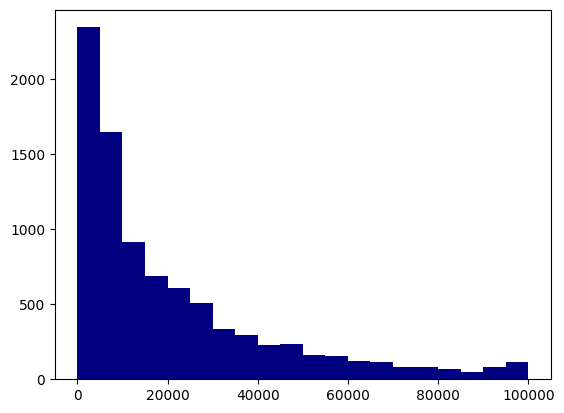

In [128]:
# Chart - 2 visualization code
plt.hist(ad_df['Size'],bins = 20,color = 'navy')
plt.show()

##### 1. Why did you pick the specific chart?


I picked the histogram plot for the rating beacuse it shows a good distribution with frequency.

##### 2. What is/are the insight(s) found from the chart?

Most of the apps have size less than 40 Mb.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the most of the apps have size less than 40 mb and most of the people have given rating more than 4 most of the apps.It can be assumed That the size of the app doesnt need to be very big meaning it doesnt have to have a lot of size taking features to be a popular app.

#### Chart - 3

<Axes: >

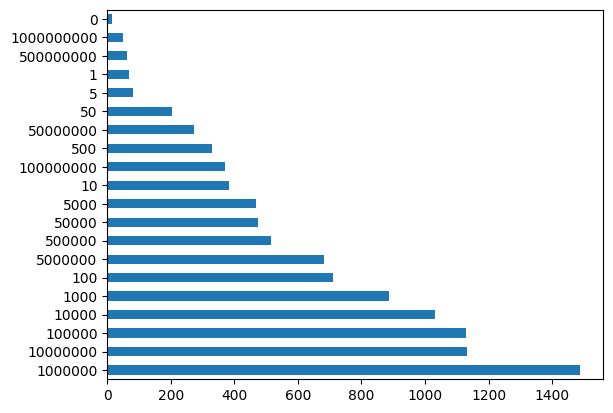

In [63]:
# Chart - 3 visualization code
ad_df['Installs'].value_counts().plot(kind='barh')


##### 1. Why did you pick the specific chart?

The vertical bar plot gives a proper idea of how many apps have reached a particular installation threshold

##### 2. What is/are the insight(s) found from the chart?

There are more than 400 apps with the highest no of intallations. And a lot of apps get an installation higher than 1000000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

from this we can understand that the potential to get high no of installations is high.

#### Chart - 4

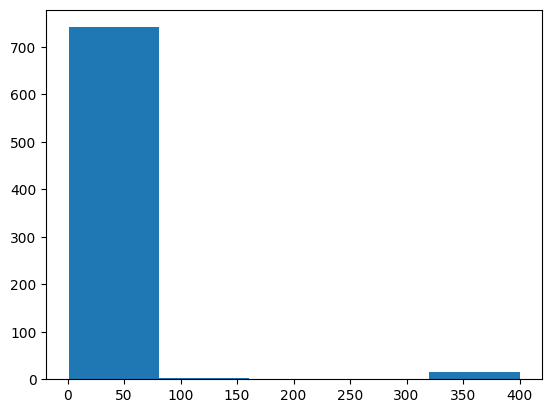

In [92]:
# Chart - 4 visualization code
plt.hist(ad_df[ad_df['Price'] !=0]['Price'],bins = 5)
plt.show()

##### 1. Why did you pick the specific chart?

The hist plot helps in understanding the distribution and out liers in data

##### 2. What is/are the insight(s) found from the chart?

The price of apps that are paid are mostly around 1$ - 75$ and then there are some in the range of 325$ - 400$

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to know that the cooman range of price is between 1-75 which will give a proper idea whether to make a free or paid app. we will also compare this with the no of installs which will give a more better insight.

#### Chart - 5

<Axes: >

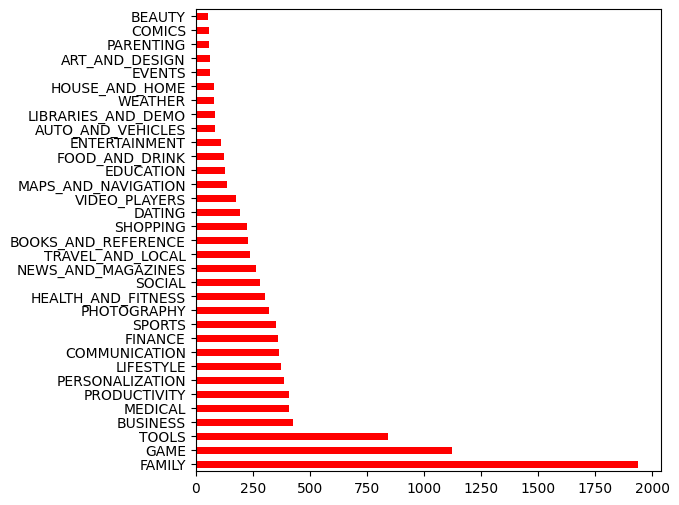

In [129]:
# Chart - 5 visualization code
ad_df['Category'].value_counts().plot(kind='barh',figsize = [6,6],color = 'Red')

##### 1. Why did you pick the specific chart?

THe bar plot on a count of categorical column give us insight on how the different categorys are popular.

##### 2. What is/are the insight(s) found from the chart?

The top 3 app categorys are Family,Game,tools Respectively

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will give us an idea on the app category we should work on.

#### Chart - 6

<Axes: ylabel='Content Rating'>

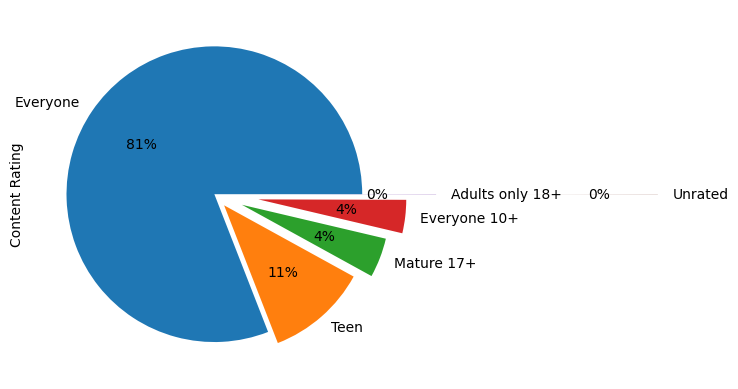

In [124]:
# Chart - 6 visualization code
ad_df['Content Rating'].value_counts().plot(kind='pie',autopct = '%1.0f%%', explode = [0,0.1,0.2,0.3,0.5,2])

In [105]:
ad_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

##### 1. Why did you pick the specific chart?

Pie chart helps in finding out the contribution of a category on a standard scale.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the content type that suits everyone are the most and thn there is teen on the 2nd.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to understand the competition in the different content ratings.

#### Chart - 7

<Axes: ylabel='Density'>

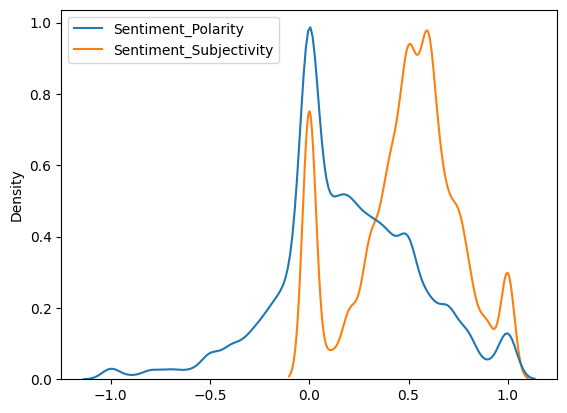

In [131]:
# Chart - 7 visualization code
sns.kdeplot(data = ur_df)

##### 1. Why did you pick the specific chart?

The kde plot gives the distribution of numerical columns here we have plotted two columns in a single chart.

##### 2. What is/are the insight(s) found from the chart?

The polarity and subjectivity is high in the middle range i.e neutral polarity is higher.but also the polarity is higher for postive than negative.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The review help in understanding the consumers thought. and since the polarityity is higher for neutral and positive then negative gives us assurance that investing time or money in apps has low risks.

#### Chart - 8

<Axes: ylabel='Sentiment'>

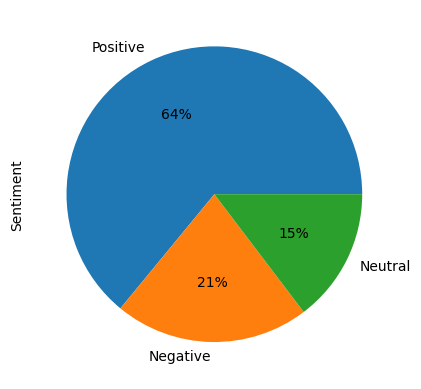

In [133]:
# Chart - 8 visualization code
ur_df['Sentiment'].value_counts().plot(kind='pie',autopct = '%1.0f%%')

##### 1. Why did you pick the specific chart?

The pie chart with count gives a good idea of how many people gave what kind of answers.

##### 2. What is/are the insight(s) found from the chart?

We found that 64% percent people have a positive sentiment towards apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The negative insights are 21% . we nedd to check which app have higher negative sentiment which help us know the apps to be clear off.

#Bivariate and Multivariate Analysis

#### Chart - 9

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


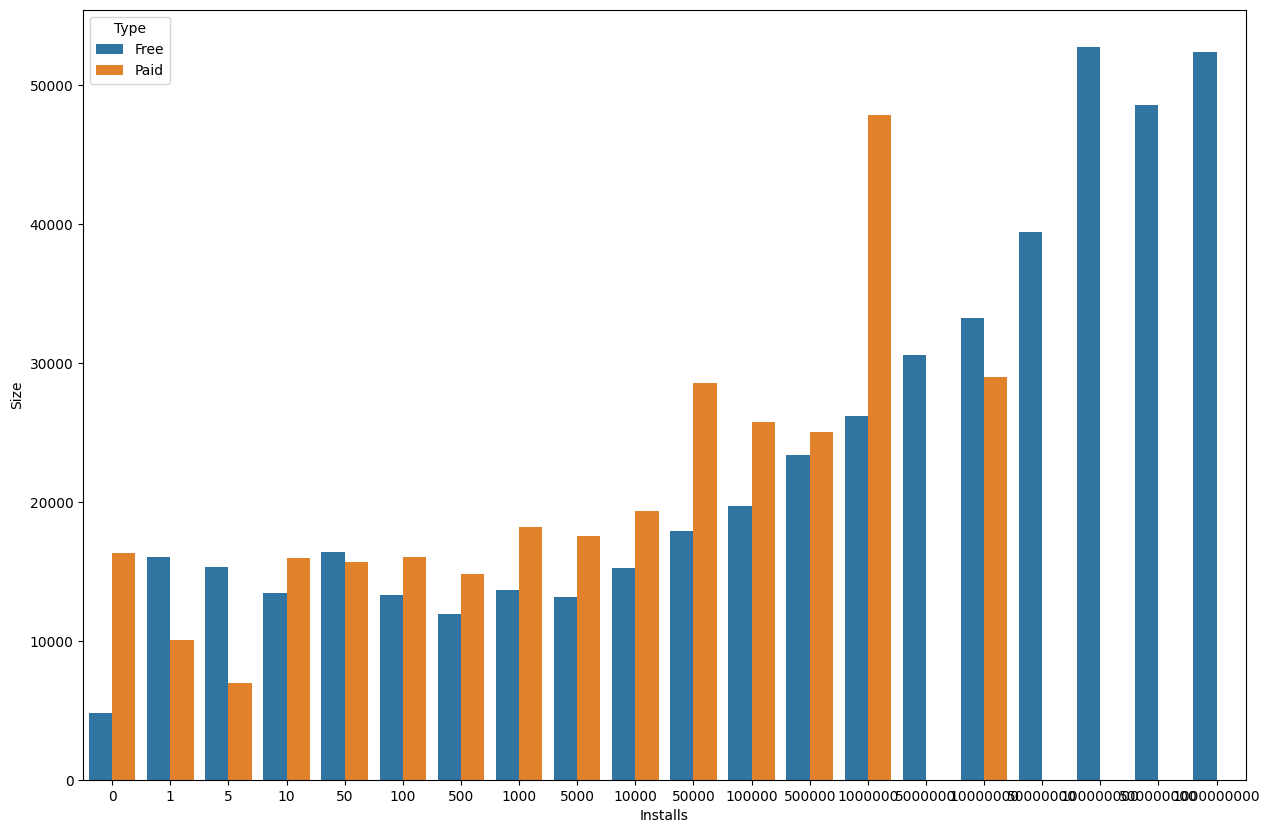

In [150]:
# Chart - 9 visualization code
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# drawing the plot
sns.barplot(data=ad_df, x='Installs', y='Size',hue='Type',errorbar=('ci', 0))
plt.show()


##### 1. Why did you pick the specific chart?

With this chart we can compare 3 columns and get a proper look how the size,install and Type are related.

##### 2. What is/are the insight(s) found from the chart?

We found that the size of paid apps is higher in the middle installation range. also as the size increases the no of installation increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this data helps to show that size is somewhat related to installtion this might be due to that as the nnumber of feature or the graphics increases the no of installation increase.

#### Chart - 10

In [308]:
#creating a list of top 10 apps on the basis of Reviews first and second order as rating as a app with high no of Reviews but also high rating is the most succesfull.
ad_df2 = ad_df.sort_values(['Reviews','Rating','Installs'],ascending = False).drop_duplicates(subset = 'App',keep = 'first')

In [309]:
top10 = ad_df2.head(10)

In [310]:
top10

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98000.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,500000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,NaN,500000000,Free,0.0,Everyone,Tools,2018-08-04,4.6.6,Varies with device
1878,Clash Royale,GAME,4.6,23136735,97000.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-06-27,2.3.2,4.1 and up


<Axes: ylabel='Category'>

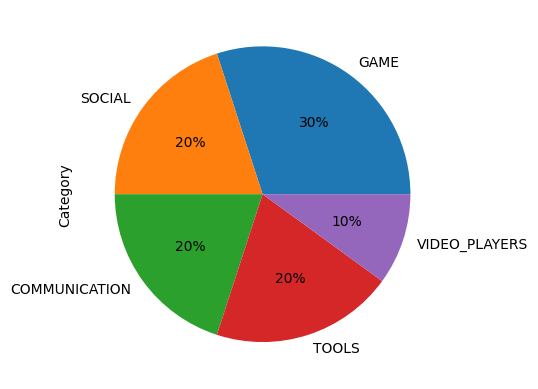

In [311]:
top10['Category'].value_counts().plot(kind ='pie',autopct = '%1.0f%%')

##### 1. Why did you pick the specific chart?

The pie chart shows that which category has high count aming the top 10 apps

##### 2. What is/are the insight(s) found from the chart?

The app of game category seems to be the most popular but the app with highest install and rating is of social category

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this chart helps in deciding the category of app to make.  

#### Chart - 11

<Axes: xlabel='Polarity', ylabel='App'>

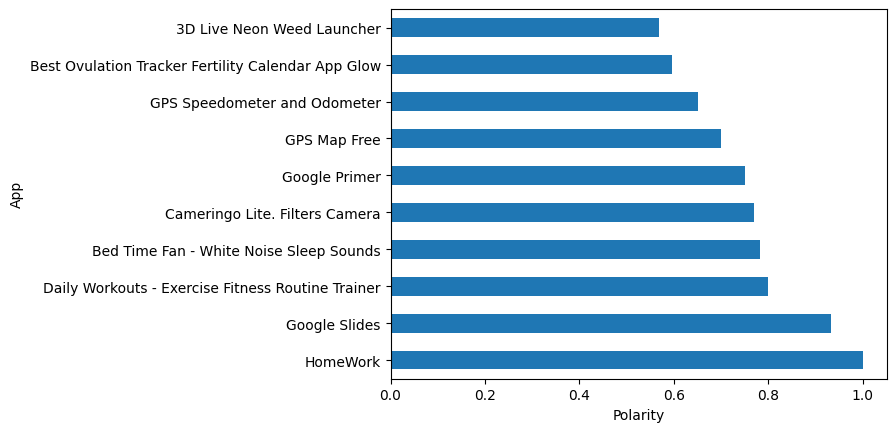

In [287]:
# Chart - 11 visualization code
top10_ur = ur_df.groupby('App')['Sentiment_Polarity'].mean().sort_values(ascending = False).head(10)
top10_ur.plot(kind='barh',xlabel = 'Polarity')

##### 1. Why did you pick the specific chart?

Compring the apps to mean of polarity using bar gives a good idea of the top 10 apps.

##### 2. What is/are the insight(s) found from the chart?

we have found the top 10 apps to have a better influence on peaople for the further info we will merge the user review and the app data to get mor information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We will understand after merging the data with the appdata

#### Chart - 12

<Axes: ylabel='Content Rating'>

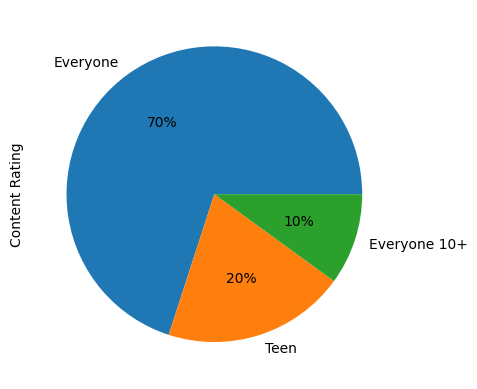

In [280]:
# Chart - 12 visualization code
top10['Content Rating'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%')

##### 1. Why did you pick the specific chart?

To find the contribution of content rating in the top 10

##### 2. What is/are the insight(s) found from the chart?

That the content rating of everyone is the best to make apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight takes us one closer to understand the kind of app would be best to make or invest in.

#### Chart - 13

In [312]:
# Chart - 13 visualization code
pd.merge(top10_ur,ad_df,on = 'App',how = 'inner')

,App,Sentiment_Polarity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,HomeWork,1.000000,EDUCATION,4.3,16195,5200.0,1000000,Free,0.0,Everyone,Education,2016-09-20,8.5.2,4.0 and up
1,Google Slides,0.933333,PRODUCTIVITY,4.2,244567,NaN,100000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
2,Daily Workouts - Exercise Fitness Routine Trainer,0.800000,HEALTH_AND_FITNESS,4.4,134195,NaN,10000000,Free,0.0,Everyone,Health & Fitness,2018-06-14,Varies with device,Varies with device
3,Bed Time Fan - White Noise Sleep Sounds,0.781250,LIFESTYLE,4.5,10097,7500.0,500000,Free,0.0,Everyone,Lifestyle,2018-04-26,1.2,4.0 and up
4,Cameringo Lite. Filters Camera,0.770269,PHOTOGRAPHY,4.2,140917,5700.0,10000000,Free,0.0,Everyone,Photography,2018-06-11,2.2.93,4.0 and up
5,Google Primer,0.750000,BUSINESS,4.4,62272,18000.0,10000000,Free,0.0,Everyone,Business,2018-06-26,3.550.2,4.1 and up
6,GPS Map Free,0.700000,TRAVEL_AND_LOCAL,4.0,33782,7600.0,5000000,Free,0.0,Everyone,Travel & Local,2018-07-11,4.6,4.0 and up
7,GPS Speedometer and Odometer,0.650000,MAPS_AND_NAVIGATION,4.8,15865,3300.0,1000000,Free,0.0,Everyone,Maps & Navigation,2018-08-03,10.0,4.1 and up
8,Best Ovulation Tracker Fertility Calendar App ...,0.595313,HEALTH_AND_FITNESS,4.6,56145,23000.0,1000000,Free,0.0,Everyone,Health & Fitness,2018-08-01,7.3.4-play,5.0 and up
9,3D Live Neon Weed Launcher,0.568182,PERSONALIZATION,4.5,1724,21000.0,100000,Free,0.0,Mature 17+,Personalization,2018-06-26,5.34.10,4.0.3 and up


In [351]:
#after merging the user_review and app data we can gain insights on the apps that have been reviewed
temp = ur_df.groupby('App')['Sentiment_Polarity'].mean().sort_values(ascending = False)
the_top10 = pd.merge(temp,ad_df2,on = 'App',how = 'inner').sort_values(['Reviews','Rating','Sentiment_Polarity'],ascending= False).head(10)
the_top10

,App,Sentiment_Polarity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
748,Facebook,-0.005909,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
685,Clash of Clans,0.040001,GAME,4.6,44893888,98000.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
675,Clash Royale,0.046237,GAME,4.6,23136735,97000.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-06-27,2.3.2,4.1 and up
698,Candy Crush Saga,0.031068,GAME,4.4,22430188,74000.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
731,8 Ball Pool,0.008782,GAME,4.5,14201891,52000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
522,BBM - Free Calls & Messages,0.138377,COMMUNICATION,4.3,12843436,NaN,100000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,4.0.3 and up
239,Cache Cleaner-DU Speed Booster (booster & clea...,0.278521,TOOLS,4.5,12759815,15000.0,100000000,Free,0.0,Everyone,Tools,2018-07-25,3.1.2,4.0 and up
431,Google Photos,0.187021,PHOTOGRAPHY,4.5,10859051,NaN,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
717,Hay Day,0.019572,FAMILY,4.5,10053186,94000.0,100000000,Free,0.0,Everyone,Casual,2018-06-28,1_39_93,4.0.3 and up
743,Dream League Soccer 2018,-0.000518,GAME,4.6,9883806,74000.0,100000000,Free,0.0,Everyone,Sports,2018-07-16,5.064,4.4 and up


In [ ]:
the_top10[["Category","Installs"]].value_counts().plot(kind = 'bar', hu')

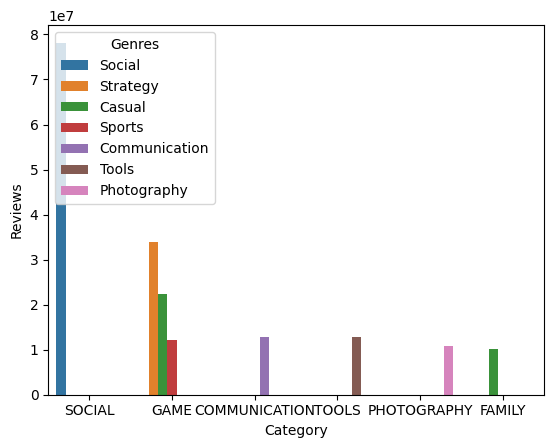

In [352]:
sns.barplot(data=the_top10, x='Category', y='Reviews', hue = 'Genres',errorbar=('ci', 0))
plt.show()

##### 1. Why did you pick the specific chart?

After merging the two data frames we can properly see the distribution of the category and genres in top 10 apps with the higher  no of reviews

##### 2. What is/are the insight(s) found from the chart?

The strategy Genres in the game category is the most popular

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After all the insights it seem that investing in a app of category Game that also has some Social activities included and an app that can be used by everyone and is free to play is better.

#### Chart - 14 - Correlation Heatmap

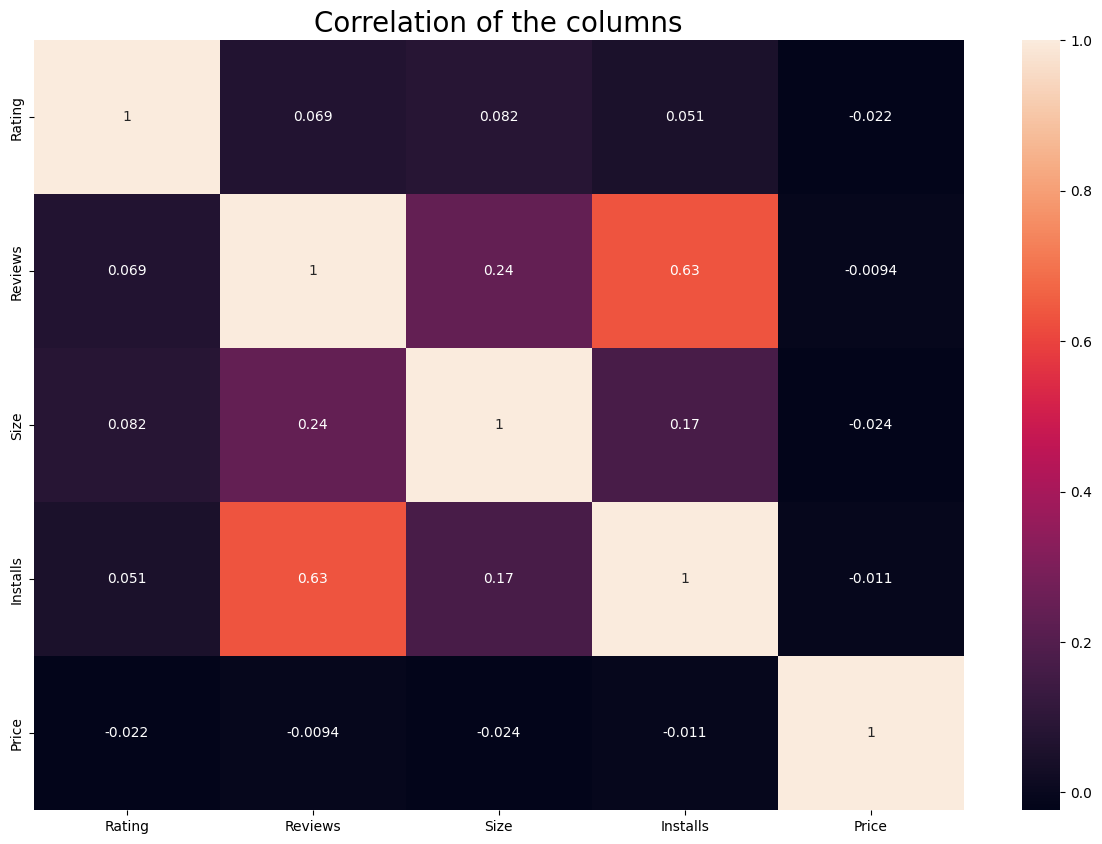

In [353]:
# Correlation Heatmap visualization code
# Setting the chart size
plt.figure(figsize=(15,10))

# Creating heatmap to see correlation of each columns
sns.heatmap(ad_df.corr(numeric_only=True),annot=True)          # Setting the numeric only colun to True to avoid warning

# Setting the title
plt.title('Correlation of the columns', fontsize=20)

# Show heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

The reviews and the installs are positively Corelated.

#### Chart - 15 - Pair Plot

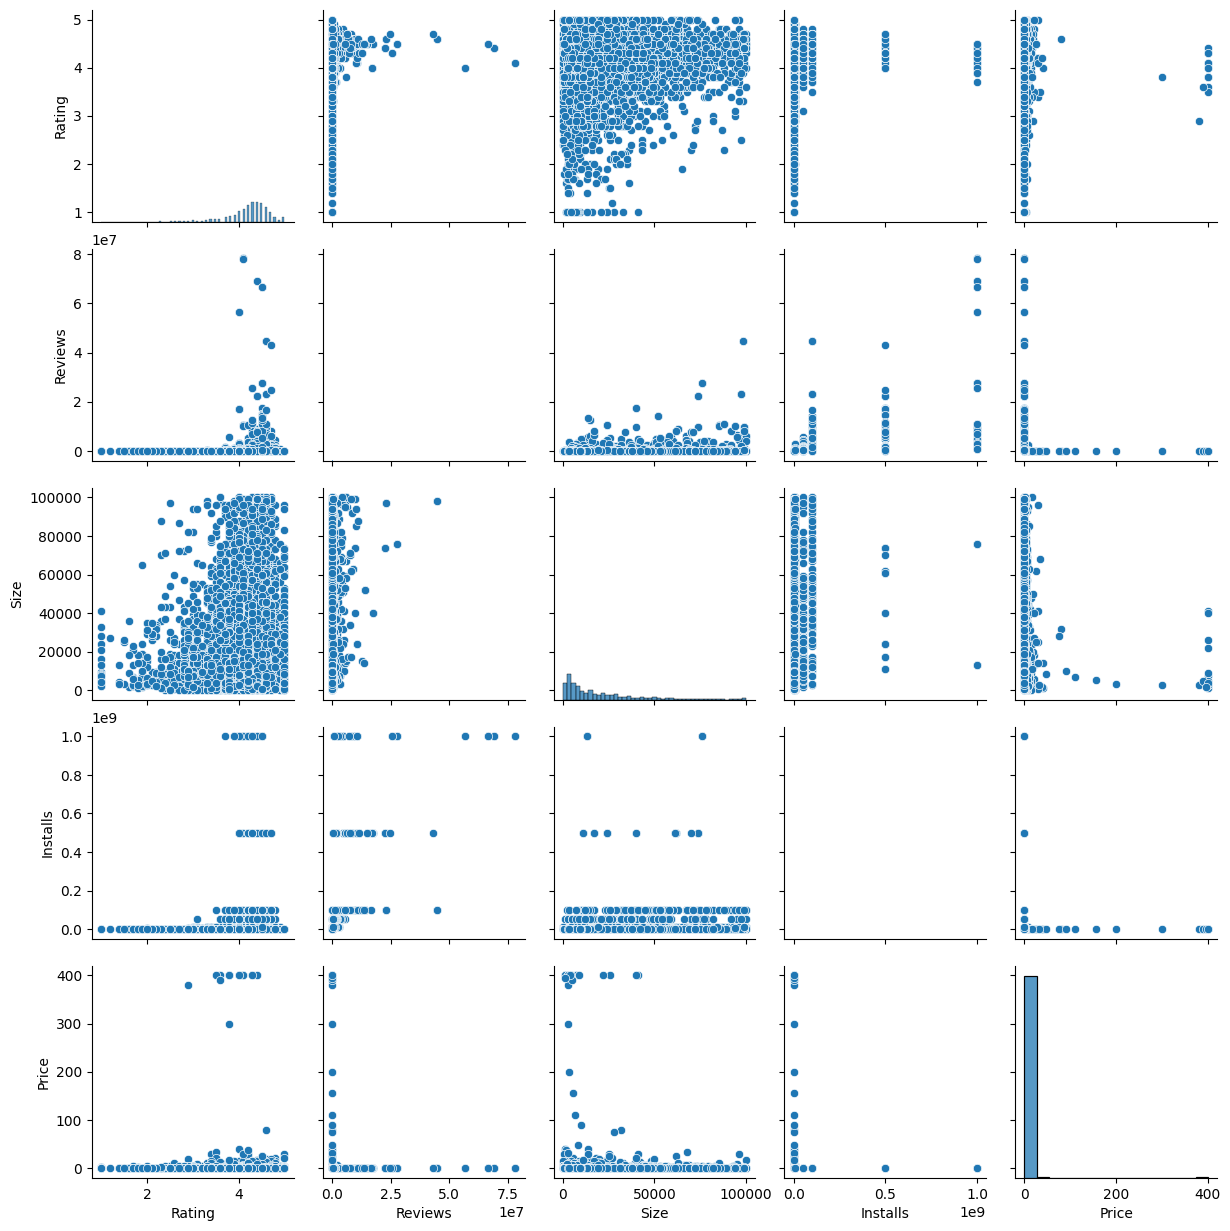

In [355]:
# Pair Plot visualization code
sns.pairplot(ad_df)
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables .

We can see the realtionship between all the columns with each other in above chart.

##### 2. What is/are the insight(s) found from the chart?

The paid apps have less number of reviews  and ratings.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Here are the criteria for a good apps.
1. The app should be Free tpo use.
2. The content rating of the app should be for every one or if targeting a age group it should be teens app.
3. The Gaming apps have a high demand but the social app is the most popular.
4. The category of gaming that are played the most are strategy and arcade.
5. As the number of installs increases the review and rating of the app stand out more.

# **Conclusion**

There two ways that we can work in the app industry.

# 1. A Social app for everyone or Teenagers.

the social apps have a huge number of installation as everyone now a days connect through them only but for the social app a lot of focus and regular updates are required.And the competion is also very high.
# 2. A Gaming app studio
The number of Games realead is increasing and the number of people that play Games is also HIgh. Once a game becomes popular another taking Its feature can be created and advertised on the basis of the last game. Also the chances of  game becoming successfull are high.If a social feature is added in the game it will boost the the amount of popularity it can gain.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***